In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


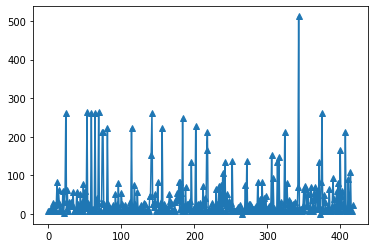

In [10]:
y = test['Fare']
plt.plot(y, marker='^')
plt.show()

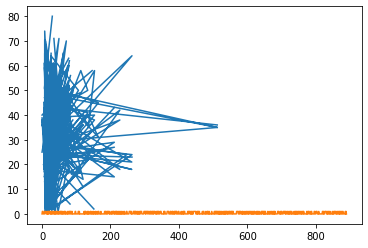

In [11]:
plt.plot(train['Fare'],train['Age'],train["Survived"])
plt.show()

In [12]:
train_sur_1 = train[train.Survived==1] # 생존
train_sur_0 = train[train.Survived==0] # 사망
# Embarked 살펴보기
count_1 = train_sur_1.Embarked_num.value_counts()
count_0 = train_sur_0.Embarked_num.value_counts()
print(count_1.values, count_0.values)
list_em = np.array( ['S', 'C', 'Q'] )
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(list_em, count_1.values, color='red', alpha=0.5)
plt.xlabel("Embarked (Survived : 1)", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.ylim([0,500])
plt.title("Embarked Bar plot", fontsize=15)
plt.subplot(1,2,2)
plt.bar(list_em, count_0.values, color='blue', alpha=0.5)
plt.xlabel("Embarked (Survived : 0)", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.ylim([0,500])
plt.title("Embarked Bar plot", fontsize=15)
plt.suptitle("Embarked bar plot")

AttributeError: 'DataFrame' object has no attribute 'Embarked_num'

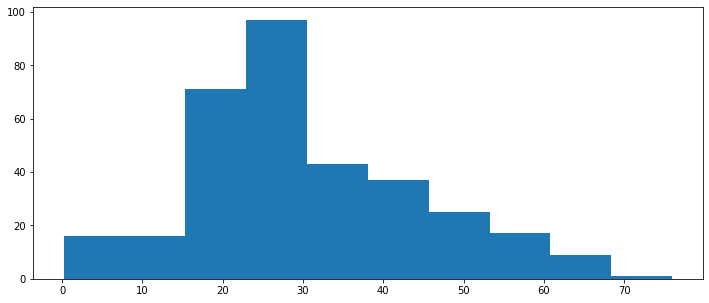

In [26]:
plt.figure(figsize=(12,5))
plt.hist(test.Age)
plt.show()

In [21]:
female = train.loc[train.sex =='female']
male = train.loc[train.sex =='male']

AttributeError: 'DataFrame' object has no attribute 'sex'

NameError: name 'female' is not defined

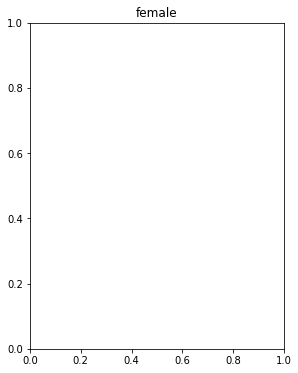

In [18]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.title("female")
plt.hist(female.age, bins=10)

plt.subplot(122)
plt.title("male")
plt.hist(male.age, bins=10, color='orange')
plt.show()

Text(0.5, 0, 'Titanic Age')

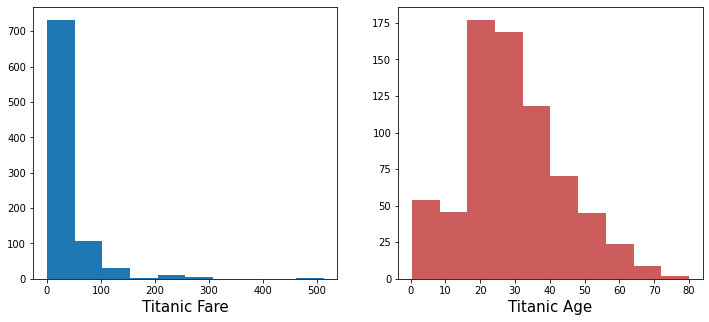

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train.Fare)
plt.xlabel("Titanic Fare", fontsize=15)
plt.subplot(1,2,2)
plt.hist(train.Age, color='indianred')
plt.xlabel("Titanic Age", fontsize=15)

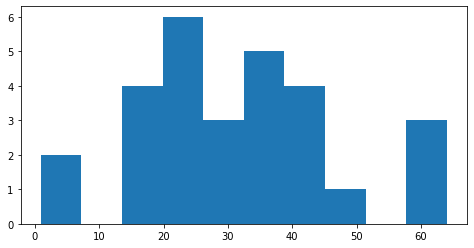

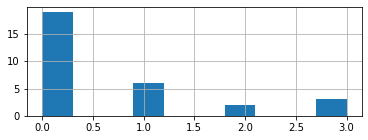

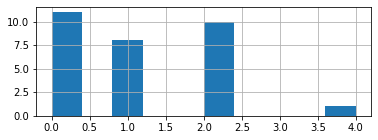

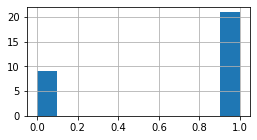

In [34]:
## 승객들 요금 순 정렬 (상위 30명)
x = train.sort_values(by='Fare', ascending=False).head(30)
y = np.array(x['Age'].sort_values())   # 나이 분포
y1 = np.array(x['SibSp'])   # 배우자, 형제 자매 분포
y2 = np.array(x['Parch'])   # 아들/딸 , 부모 분포
y3 = np.array(x['Survived'])   # 생존자 분포
fig = plt.figure(figsize=(8, 4))
plt.hist(y)
fig1 = plt.figure(figsize=(6,2))
plt.hist(y1)
plt.grid()
fig2 = plt.figure(figsize=(6,2))
plt.hist(y2)
plt.grid()
fig3 = plt.figure(figsize=(4,2))
plt.hist(y3)
plt.grid()
plt.show()

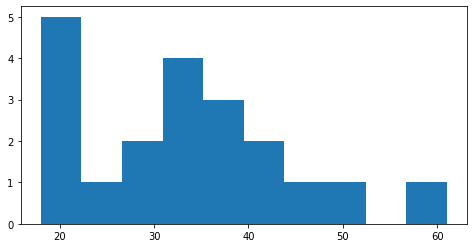

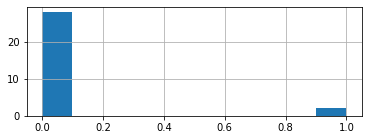

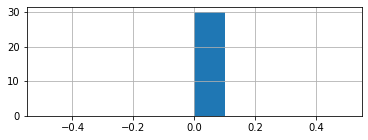

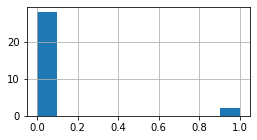

In [35]:
## 승객들 요금 순 정렬 (하위 30명)
x = train.sort_values(by='Fare', ascending=False).tail(30)
y = np.array(x['Age'].sort_values())   # 나이 분포
y1 = np.array(x['SibSp'])   # 배우자, 형제 자매 분포
y2 = np.array(x['Parch'])   # 아들/딸 , 부모 분포
y3 = np.array(x['Survived'])   # 생존자 분포
fig = plt.figure(figsize=(8, 4))
plt.hist(y)
fig1 = plt.figure(figsize=(6,2))
plt.hist(y1)
plt.grid()
fig2 = plt.figure(figsize=(6,2))
plt.hist(y2)
plt.grid()
fig3 = plt.figure(figsize=(4,2))
plt.hist(y3)
plt.grid()
plt.show()

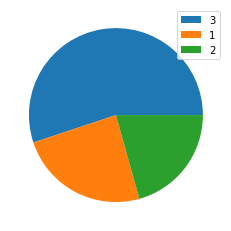

In [36]:
## 모든 승객 Pclass 비율 출력
x = train.sort_values(by='Pclass')
x = x['Pclass'].value_counts()
x = np.array(x)
fig = plt.figure(figsize=(4,4))
plt.pie(x)
plt.legend(['3', '1', '2'])
plt.show()

Text(0.5, 1.0, 'Sex Bar plot')

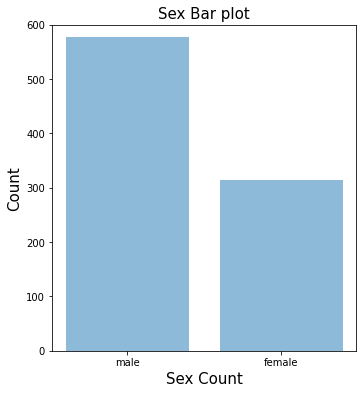

In [37]:
# # barplot 그리기
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(train.Sex.unique(), train.Sex.value_counts(), alpha=0.5)
plt.xlabel("Sex Count", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.ylim([0,600])
plt.title("Sex Bar plot", fontsize=15)